#### About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem
- The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


**Dataset:** https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

**Data Columns**
| Variable | Description |
|----------|-------------|
| Product Purchased | KP281, KP481, or KP781 |
| Age | In years |
| Gender | Male/Female |
| Education | In years |
| Marital Status | Single or partnered |
| Usage (per week) | The average number of times the customer plans to use the treadmill each week |
| Income ($) | Annual income (in $) |
| Fitness (1-5) | Self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is excellent shape |
| Miles (per week) | The average number of miles the customer expects to walk/run each week |

#### Product Portfolio: 
- The KP281 is an entry-level treadmill that sells for $1,500.
- The KP481 is for mid-level runners that sell for $1,750.
- The KP781 treadmill is having advanced features that sell for $2,500.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df["Gender"] = df["Gender"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")
df["Product"] = df["Product"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [9]:
num_cols = ['Age', 'Income', 'Miles']
cat_cols = ['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [20]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [21]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [22]:
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

#### Insights 1
#### Shape of data:
1. This is a small dataset with 180 rows and 9 cols. Small dataset.

#### Conversion of data types
1. Converted cols [Produc, Gender, Marital Status] to Category data type as it takes less memory and useful for applying grouping, sorting
#### Statistical summary
1. Age - 18 yrs to 50 yrs
2. Education - 12 - 21 yrs
3. Usage - 2 to 7 per week
4. Fitness score - 1 to 5
5. Annual Income - 30,000 to 10,5000
6. Miles - 21 to 360 miles per week with an average of 103 miles/week

In [13]:
# Group by Product
df.groupby("Product").aggregate({
    "Age":["mean", "median", "min", "max", "count"],
    "Education": ["mean", "median", "min", "max", "count"],
    "Income": ["mean", "median", "min", "max", "count"]
})

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1624/388487769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Product").aggregate({


Age                       Education                       \
          mean median min max count       mean median min max count   
Product                                                               
KP281    28.55   26.0  18  50    80  15.037500   16.0  12  18    80   
KP481    28.90   26.0  19  48    60  15.116667   16.0  12  18    60   
KP781    29.10   27.0  22  48    40  17.325000   18.0  14  21    40   

            Income                                
              mean   median    min     max count  
Product                                           
KP281    46418.025  46617.0  29562   68220    80  
KP481    48973.650  49459.5  31836   67083    60  
KP781    75441.575  76568.5  48556  104581    40

#### Insights
1. Income levels of customers are higher for product KP781.

In [14]:
df.groupby("Product").agg({
    "Miles":["mean", "median", "min", "max", "count"],
    "Usage": ["mean", "median", "min", "max", "count"],
    "Fitness":["mean", "median", "min", "max", "count"]
})

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1624/2312570911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Product").agg({


Miles                           Usage                       \
               mean median min  max count      mean median min max count   
Product                                                                    
KP281     82.787500   85.0  38  188    80  3.087500    3.0   2   5    80   
KP481     87.933333   85.0  21  212    60  3.066667    3.0   2   5    60   
KP781    166.900000  160.0  80  360    40  4.775000    5.0   3   7    40   

        Fitness                       
           mean median min max count  
Product                               
KP281    2.9625    3.0   1   5    80  
KP481    2.9000    3.0   1   4    60  
KP781    4.6250    5.0   3   5    40

#### Insights
1. For KP781
   - Usage level of KP781 are higher with median of 5 and range from 3 to 7.
   - Fitness level of KP781 are higher with median of 5 and range from 3 to 5.
   - Miles used of KP781 are higher with median of 160 and range from 80 to 360.
   - Customers tend to have higher education levels.
   - Customers tend to have marginally higher income group buy this treadmill
   - Customers preferring more workout frequency and covering higher miles per week.
 
2. For KP281 and KP481
    - miles used, usage level and fitness levels are quite similar.
    - Young customers with lower income and lower education levels.
    - customers with moderate workout frequency and covering fewer miles per week.

In [16]:
pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


#### Insights
1. Aerofit Fitness products distribution by Gender - 58% Male, 42% Female 
2. KP781 is purchased by more Male (18%) than Female (3%)

In [23]:
#num_cols = ['Age', 'Income', 'Miles']
#cat_cols = ['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']

pd.crosstab (index=df['Education'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Education,,,,
12,0.011111,0.005556,0.000000,0.016667
13,0.016667,0.011111,0.000000,0.027778
14,0.166667,0.127778,0.011111,0.305556
15,0.022222,0.005556,0.000000,0.027778
16,0.216667,0.172222,0.083333,0.472222
18,0.011111,0.011111,0.105556,0.127778
20,0.000000,0.000000,0.005556,0.005556
21,0.000000,0.000000,0.016667,0.016667
All,0.444444,0.333333,0.222222,1.000000


#### Insights
1. Customers having education levels 16-21 prefer KP781
2. Customers having education levels 12-15 prefer KP281, KP481

In [24]:
pd.crosstab (index=df['MaritalStatus'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


In [25]:
pd.crosstab (index=df['Usage'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.105556,0.077778,0.000000,0.183333
3,0.205556,0.172222,0.005556,0.383333
4,0.122222,0.066667,0.100000,0.288889
5,0.011111,0.016667,0.066667,0.094444
6,0.000000,0.000000,0.038889,0.038889
7,0.000000,0.000000,0.011111,0.011111
All,0.444444,0.333333,0.222222,1.000000


#### Insights
1. Customers with higher usage levels (4-5 days a week) prefer KP781
2. Customers with lower to moderate usage levels (2-4 days a week) prefer KP281, KP481

In [26]:
pd.crosstab (index=df['Fitness'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
All,0.444444,0.333333,0.222222,1.000000


#### Insights
1. Customers with fitness goals levels (3-5) prefer KP781
2. Customers with moderate fitness goals levels (1-3) prefer KP281, KP481

#### Univariate Analysis


<Axes: xlabel='Gender', ylabel='Income'>

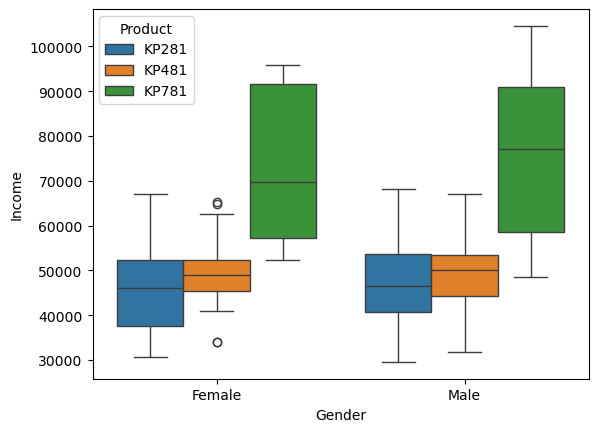

In [28]:
sns.boxplot(x='Gender', y='Income', hue= 'Product', data=df)

#### Insights
1. Customer purchasing KP781 tend to have higher median incomes than KP281 and KP481.

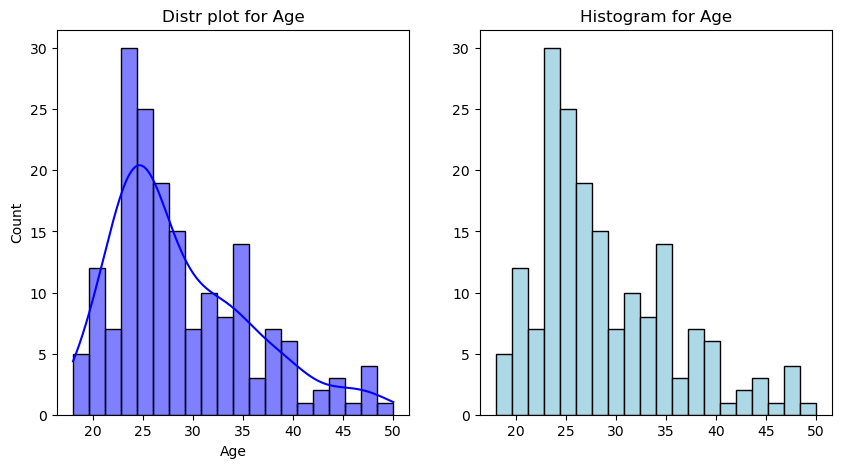

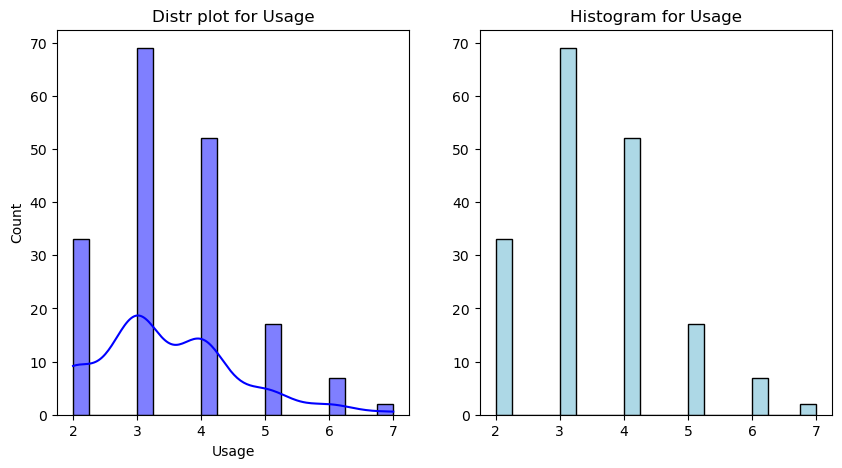

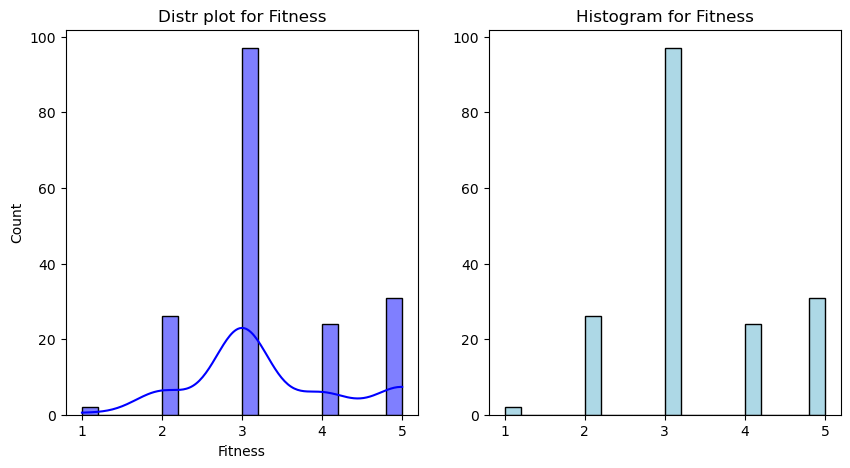

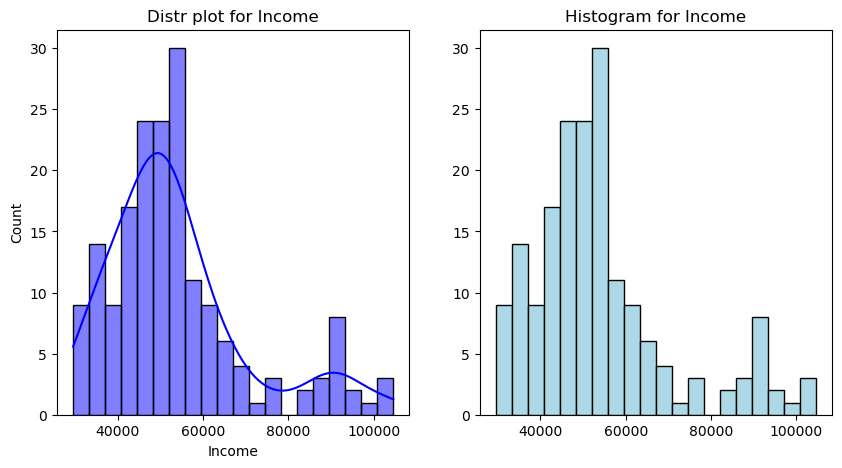

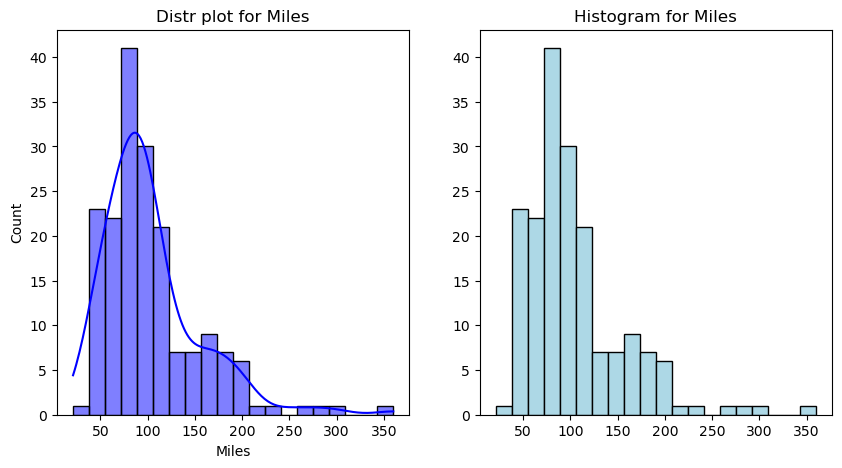

In [29]:
continuous_var = ["Age", "Usage", "Fitness", "Income", "Miles"]

for var in continuous_var:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, bins=20, color='blue')
    plt.title(f'Distr plot for {var}')

    plt.subplot(1,2,2)
    plt.hist(df[var], bins=20, color='lightblue', edgecolor='black')
    plt.title(f'Histogram for {var}')

    plt.show()

<Axes: xlabel='Gender', ylabel='Education'>

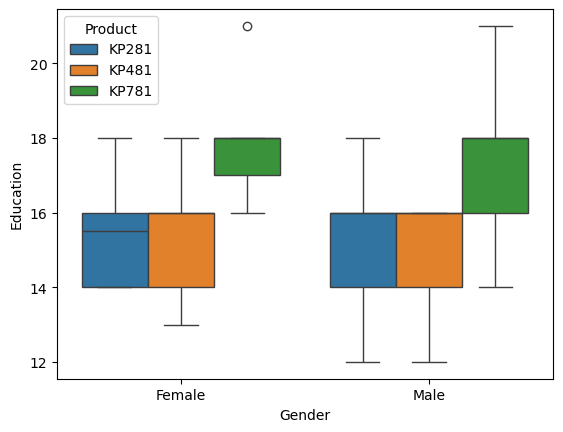

In [31]:
sns.boxplot(x='Gender', y='Education', hue= 'Product', data=df)

#### Insights
1. Customer purchasing KP781 tend to have higher Education level than KP281 and KP481.

<Axes: xlabel='Gender', ylabel='Miles'>

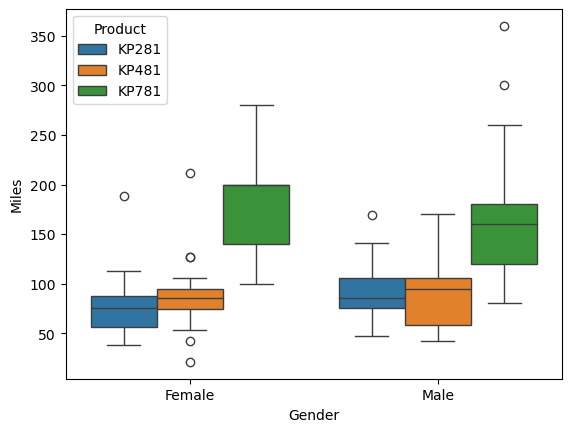

In [33]:
sns.boxplot(x='Gender', y='Miles', hue= 'Product', data=df)

#### Insights
1. Customer purchasing KP781 tend to have higher miles than KP281 and KP481.

<Axes: xlabel='Miles', ylabel='Income'>

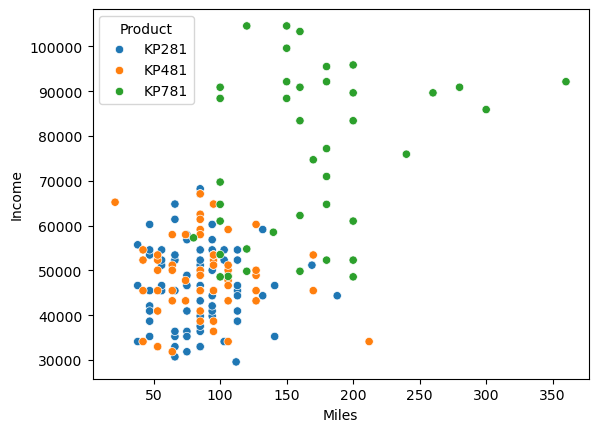

In [34]:
sns.scatterplot(x='Miles', y='Income', hue= 'Product', data=df)

#### Insights
1. Customer purchasing KP781 tend to have higher incomes and higher miles used.
2. Customers purchasing KP281 and KP481 have incomes < 70K and miles used < 150 miles

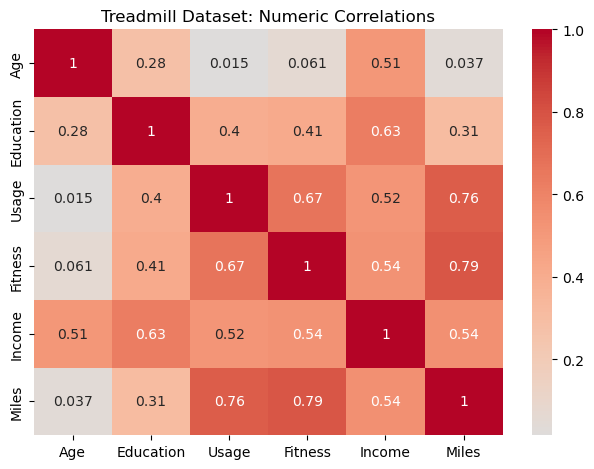

In [36]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Treadmill Dataset: Numeric Correlations')
plt.tight_layout()
plt.show()

#### Insights
1. Fitness and Miles are positively correlated
2. Usage and Fitness are positively correlated
3. Usage and Miles are positively correlated

#### Conditional Probabilities

In [37]:
print("Probability (Product | Male)")
df[df["Gender"] == "Male"]["Product"].value_counts(normalize=True)

Probability (Product | Male)


Product
KP281    0.384615
KP781    0.317308
KP481    0.298077
Name: proportion, dtype: float64

In [38]:
pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


#### Insights
Prob of buying KP781 given that he is a male is 32%.

In [39]:
print("\nProbability (Product | Female)")
df[df["Gender"] == "Female"]["Product"].value_counts(normalize=True)


Probability (Product | Female)


Product
KP281    0.526316
KP481    0.381579
KP781    0.092105
Name: proportion, dtype: float64

### Insights
1. Equal distribution of product types among Male gender
2. Female users are more likely to buy KP281 and very unlikely to buy KP781

In [40]:
#Prob (Female | KP281): 0.5
#Prob (KP281 | Female): 0.52

pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


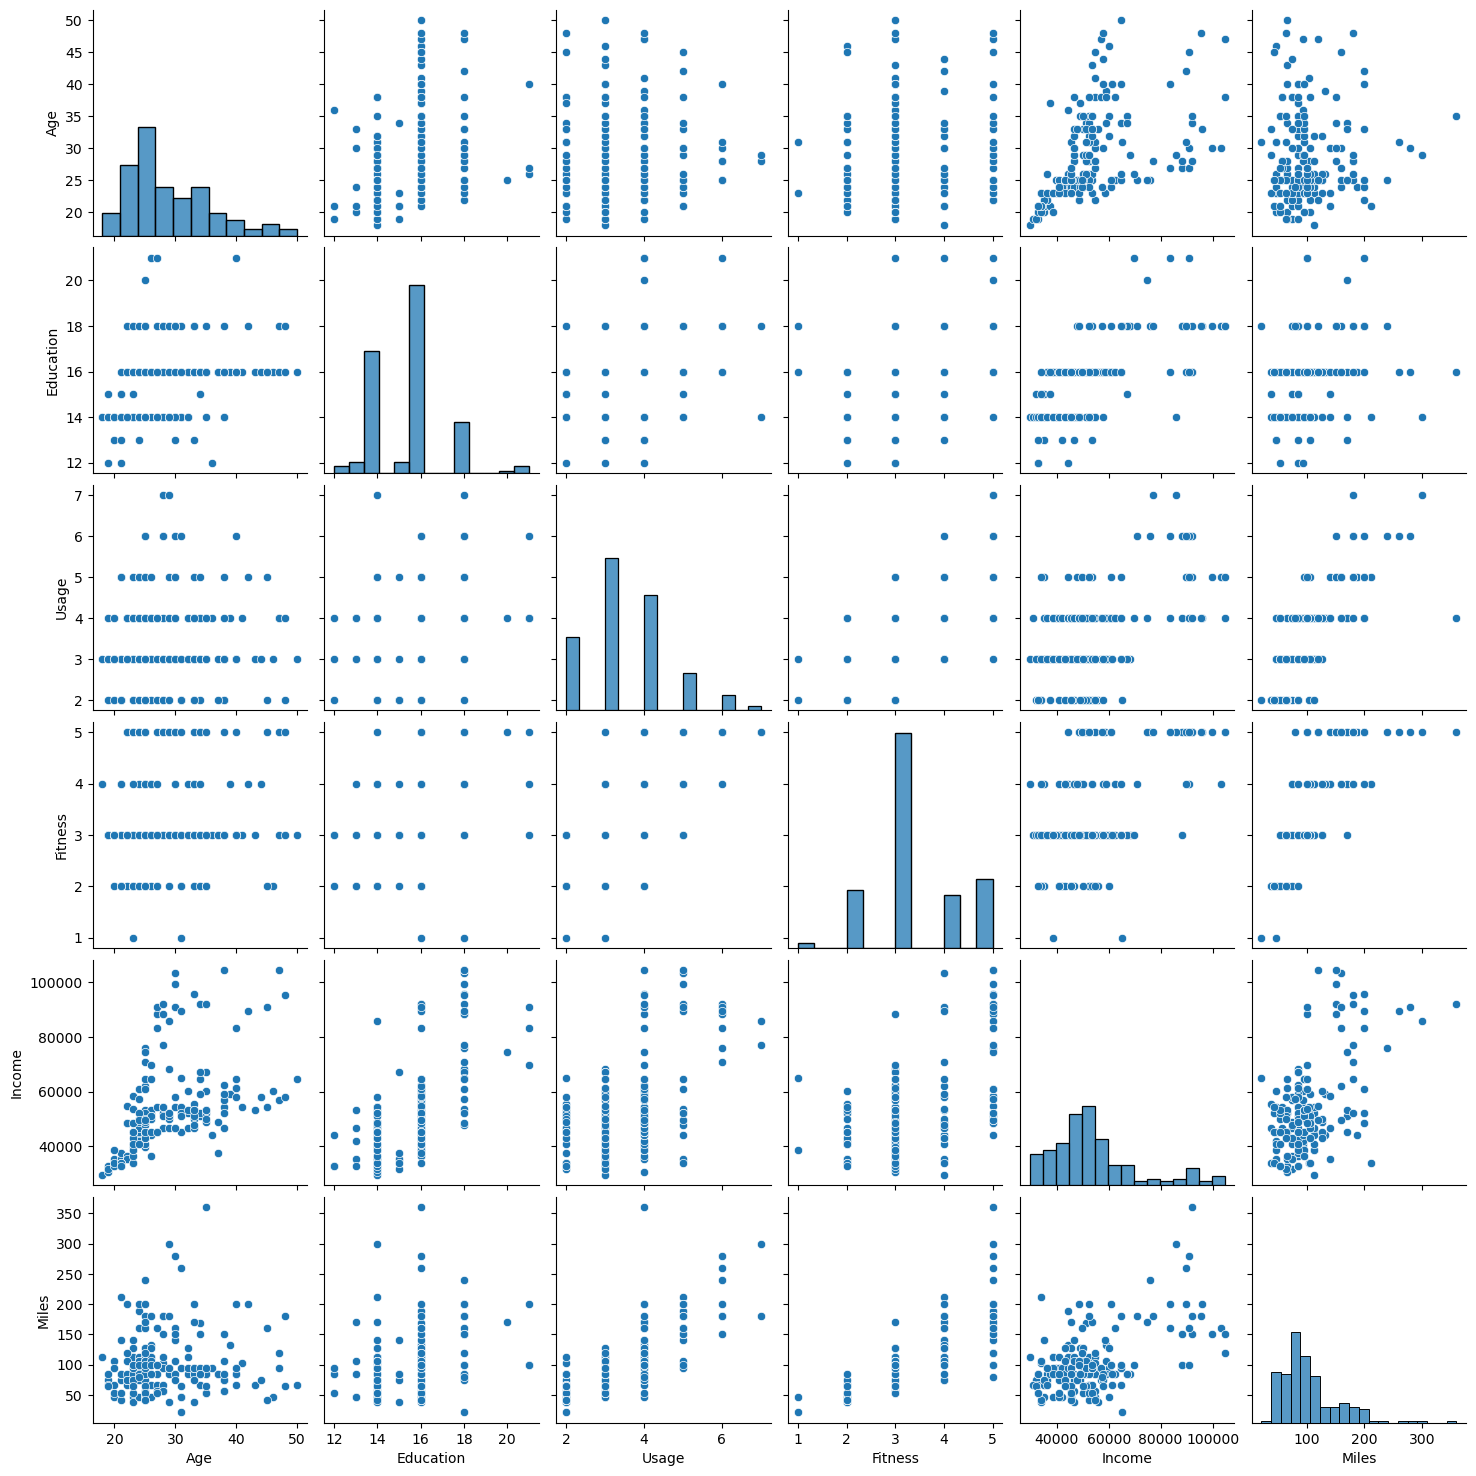

In [41]:
sns.pairplot(df, kind='scatter')

### Insights 
1. KP781 users have different characteristics than those of KP281, KP481
2. Income, Fitness, Miles have higher correlation 

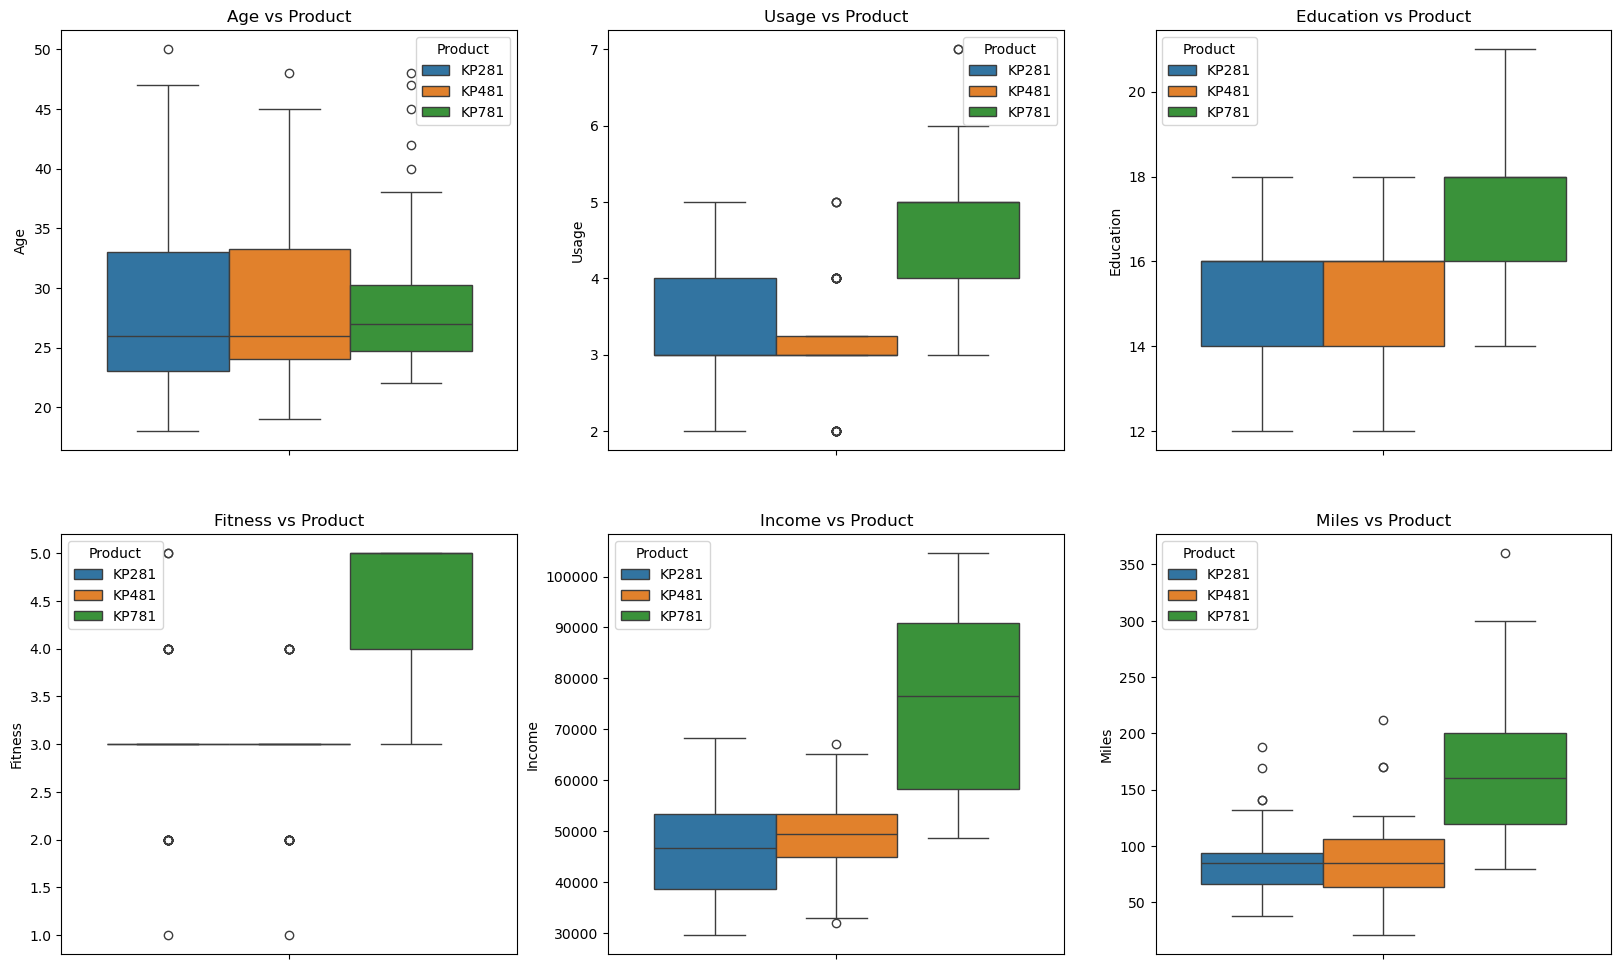

In [44]:
variables = ["Age", "Usage", "Education", "Fitness", "Income", "Miles"]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, y=variable, hue="Product")
        axes[i, j].set_title(f"{variable} vs Product") 

plt.show()

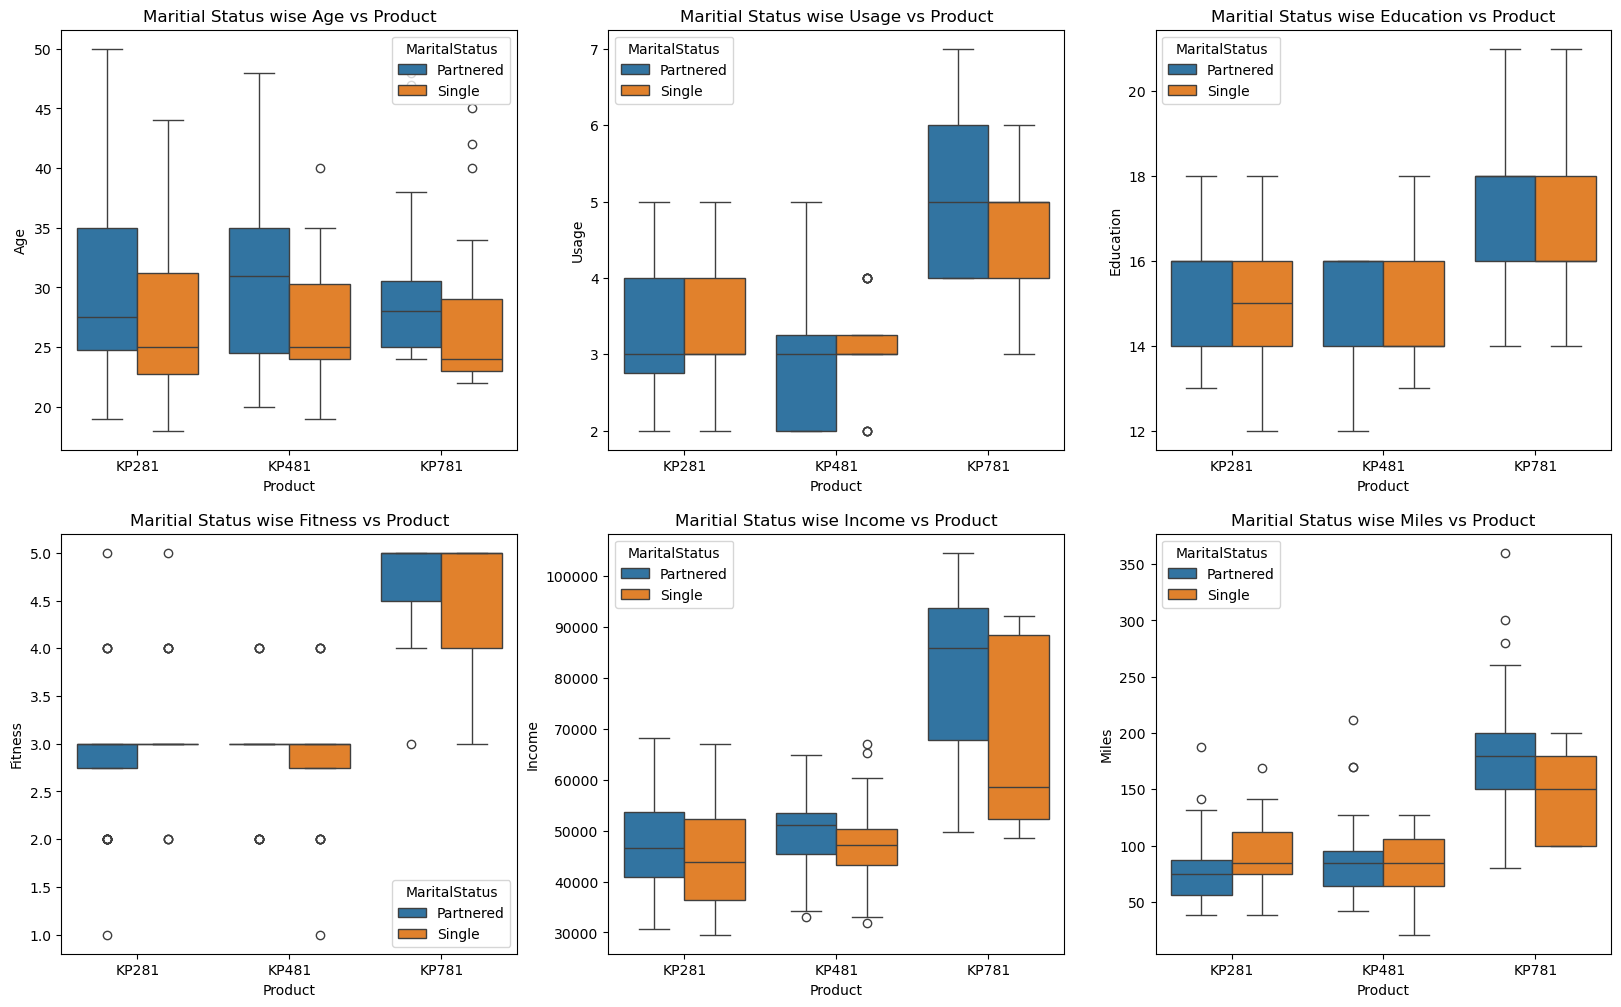

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, x="Product", y=variable, hue="MaritalStatus")
        axes[i, j].set_title(f"Maritial Status wise {variable} vs Product") 
plt.show();

### Insights
1. Fitness, Income, Miles, Usage have very high positive correlations with each KP781,
2. Male user have positive correlations with KP781, but have negative correlations with other products
3. Female user have positive correlations with KP281 and KP481, but have negative correlations with KP781

In [50]:
# Exact probability calculation
# P(Product=KP781 | Income ≥ $70K) = 1.0
high_income_prob = (
    df[df['Income'] >= 70000]
    .groupby('Product')
    .size()
    .div(len(df[df['Income'] >= 70000])) * 100
)

print(f"KP781 probability for Income >= $70K: {high_income_prob.get('KP781', 0):.1f}%")


KP781 probability for Income >= $70K: 100.0%


/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1624/2058543301.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Product')


#### Insight
1. P(Product=KP781 | Income ≥ $70K) = 1.0
   - Marketing: "Guaranteed satisfaction for $70K+ earners"
   - Sales funnel: Auto-recommend KP781 for high-income leads


In [52]:
# Exact probability calculation
# Method 1: Exact crosstab by education level
edu_prob = pd.crosstab(
    index=df['Education'], 
    columns=df['Product'], 
    normalize='index'  # Row-wise conditional probability
)[['KP781']] * 100

print("KP781 Purchase Probability by Education:")
print(edu_prob.round(1))

KP781 Purchase Probability by Education:
Product    KP781
Education       
12           0.0
13           0.0
14           3.6
15           0.0
16          17.6
18          82.6
20         100.0
21         100.0


#### Insight
1. P(Product=KP781 | Education ≥ 18) = 82%
2. P(Product=KP781 | Education ≥ 20) = 100%
Customers with 18 years of education have an 82.6% probability of purchasing
the KP781, and those with 20 or 21 years of education have a 100% probability
of choosing the KP781. This suggests that customers with higher education
levels tend to prefer the most advanced treadmill model.

In [54]:
# Exact probability calculation
# Method 1: Exact crosstab by education level
usage_prob = pd.crosstab(
    index=df['Usage'], 
    columns=df['Product'], 
    normalize='index'  # Row-wise conditional probability
)[['KP781']] * 100

print("KP781 Purchase Probability by Usage:")
print(usage_prob.round(1))

KP781 Purchase Probability by Usage:
Product  KP781
Usage         
2          0.0
3          1.4
4         34.6
5         70.6
6        100.0
7        100.0


#### Insight
1. P(Product=KP781 | Usage ≥ 6) = 100%
   - Customers who plan to use the treadmill 6 or 7 times a week have a 100%
probability of purchasing the KP781. This indicates that the most frequent users,
who are likely serious about their fitness routines, prefer the high-end model with
advanced features.

In [56]:
# Miles binned vs Product choice
df['Miles_Group'] = pd.cut(df['Miles'], bins=[0, 50, 150, float('inf')], 
                          labels=['<50', '50-150', '>150'])
miles_prob = pd.crosstab(df['Miles_Group'], df['Product'], 
                        normalize='index') * 100

print(miles_prob[['KP281', 'KP781']].round(1))

Product      KP281  KP781
Miles_Group              
<50           70.6    0.0
50-150        48.9   12.6
>150           7.1   82.1


#### Insight
1. P(Product=KP781 | miles ≥ 150) = 82%
2. P(Product=KP281 | miles < 50) = 70%
   - Customers who run more than 150 miles per week have an 82.1% probability of
purchasing the KP781, while those who run fewer than 50 miles per week have a
70.5% probability of choosing the KP281. This shows that the KP781 is favoured
by more serious runners, whereas casual users prefer the entry-level model.

#### **Customer Profile**

| Product | Age | Income | Fitness | Miles/Week | Usage/Week | Education | Marital | Gender |
|--------|------|--------|---------|------------|------------|-----------|---------|--------|
| KP281 | 28-35 | < $52K | < 3 | 70-90 | 3-4x | 14-16 yrs | Both | Both |
| KP481 | 28-35 | < $52K | < 3 | 60-100 | 3x | < 16 yrs | Both | 52% Male |
| KP781 | < 30 | > $60K | > 4 | 120-200 | 4-5x | 16-18 yrs | Both | 82.5% Male |

#### Recommendations **KP781:**
1. **Target  High Income Customers:**
   - Focus on individuals with incomes > 70K

2. **Highligh Advanced features:**
   - premium positioning: Emphasize the advanced features of KP781 in marketing materials to appeal to
customers with high fitness levels and extensive running habits

3. **Promotion**
    - Promote in fitness channels who work out frequently (5+ days per week)

4. **Introduce Financing Options**
   - Female discounts KP781 ✓ → Add: Dynamic pricing: KP781 subscription ($99/mo) for young professionals
   - KP781 female targeting ✓ → Add: 0% EMI financing for high-fitness/low-income males​
   - KP781: 16-18 yrs → "Premium for College-Educated Professionals"

5. **Bundle offers**
   - Bundles by fitness/miles ✓ → Add: "Fitness Ladder Bundle" (KP281→KP481→KP781 upgrade path)​

6. **Target KPI**
    -  KP781: 120-200 → Target: +10% via elite challenges 

#### Recommendations **KP481:**
1. **Target  Middle Income Women:**
   - Focus on women aged 32-37 with incomes < 70K

2. **Highligh verstatlity:**
   - Promote the KP481's versatility for younger users (under 25) with moderate to
high running distances (100-150 miles per week).

3. **Use Age and Fitness Data**
   - Utilize age and fitness level data to customize marketing campaigns, showcasing
how KP481 meets the needs of customers with specific fitness goals and
routines.

4. **Target KPI**
    - KP481: 60-100 → Target: +20% via mid-level plans 

#### Recommendations **KP281:**

1. **Target Older Women:**
    - Direct marketing campaigns towards women over 40 with incomes below
    - KP281/481: <16 yrs education → "Affordable Fitness for Everyone"

2. **Focus on Moderate Users:**
    - Highlight the benefits of KP281 for customers with moderate usage patterns (2-3 days/week)

3. **Segment Marketing by Income and Usage:**
    - Tailor messages to different income brackets, emphasizing affordability and
reliability for those earning [$35,000-$70,000] and using the treadmill moderately.

4. **Primary KPI**: Miles/Week per Product
    - KP281: 70-90 → Target: +15% via beginner challenges

#### Additional Recommendations to boost Sales
1. Offer trade in programs - Introduce trade in offers for older models.
2. Loyalty programs - Membership or exclusive offers
3. Customer Education - webinars or educational content highlighting features and how it can meet their goals.

#### How does this help Business ?
- Understanding the features and characteristics that appeal most to
our customers has enabled us to prioritize enhancements and updates that align with their
preferences, ensuring that our products remain competitive in the market